In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_cendus_poi = pd.read_pickle('../clean_pickles/target_cendus_poi.pk')
df_cendus_poi_sub = pd.read_pickle('../clean_pickles/target_cendus_poi_sub.pk')
df_dianping_poi = pd.read_pickle('../clean_pickles/target_dianping_poi.pk')
df_dianping_poi_cat = pd.read_pickle('../clean_pickles/target_dianping_poi_cat.pk')
df_mobike = pd.read_pickle('../clean_pickles/target_mobike.pk')
df_mobike_byhours = pd.read_pickle('../clean_pickles/target_mobike_byhours.pk')
df_re = pd.read_pickle('../clean_pickles/target_real_estate.pk')
df_taxi = pd.read_pickle('../clean_pickles/target_taxi_speed.pk')
df_weibo = pd.read_pickle('../clean_pickles/target_weibo.pk')

In [3]:
df_pred = df_cendus_poi.iloc[:,9:len(df_cendus_poi.columns)]
df_pred = df_pred.join(df_cendus_poi_sub.iloc[:,9:len(df_cendus_poi_sub.columns)], rsuffix='_sub')
df_pred = df_pred.join(df_dianping_poi.iloc[:,9:len(df_dianping_poi.columns)])
df_pred = df_pred.join(df_dianping_poi_cat.iloc[:,9:len(df_dianping_poi_cat.columns)])
df_pred = df_pred.join(df_mobike.iloc[:,9:len(df_mobike.columns)])
df_pred = df_pred.join(df_mobike_byhours.iloc[:,9:len(df_mobike_byhours.columns)])
df_pred = df_pred.join(df_re.iloc[:,9:len(df_re.columns)])
df_pred = df_pred.join(df_taxi.iloc[:,9:len(df_taxi.columns)])
df_pred = df_pred.join(df_weibo.iloc[:,9:len(df_weibo.columns)])

### Number of criterias

In [4]:
len(df_pred.columns)

149

- I have created a lot of criteria during the first step of the work but some of them contains too many NA
- The 2 followings functions are used to clean the columns with too many NA unless the proprotion of each class will be kept if we removed the rows associated (basicaly instead of removing the column, I remove the row to remove th NAs)

In [5]:
def cleanCriteriasNoiseSmell(df):
    droppingColumns = []
    nb0 = df.iloc[:,len(df.columns)-1].value_counts()[0]
    nb1 = df.iloc[:,len(df.columns)-1].value_counts()[1]
    ratio = nb1 / nb0
    counter = 0
    for i in range(0,len(df.columns)-1):
        # 10 NA max to remove a maximum of 3 % of the points
        if len(df[df.iloc[:,i].isna()]) > 10:
            nbi0 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[0]
            try:
                nbi1 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[1]
            except KeyError:
                nbi1 = 0
            #if the proportion of the class is kept then we keep the criterion
            if (nbi1/nbi0) > ratio:
                droppingColumns.append(df.iloc[:,i].name)
                counter +=1
                print(df.iloc[:,i].name,  len(df[df.iloc[:,i].isna()]))
    print(counter)
    return df.drop(columns=droppingColumns)
    

In [6]:
def cleanCriteriasClean(df):
    droppingColumns = []
    nb1 = df.iloc[:,len(df.columns)-1].value_counts()[1]
    nb2 = df.iloc[:,len(df.columns)-1].value_counts()[2]
    nb3 = df.iloc[:,len(df.columns)-1].value_counts()[3]
    nb4 = df.iloc[:,len(df.columns)-1].value_counts()[4]
    ratio = (nb1+nb4) / (nb2+nb3)
    counter = 0
    for i in range(0,len(df.columns)-1):
        # 10 NA max to remove a maximum of 3 % of the points
        if len(df[df.iloc[:,i].isna()]) > 10:
            try:
                nbi1 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[1]
            except KeyError:
                nbi1 = 0
            try:
                nbi2 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[2]
            except KeyError:
                nbi2 = 0
            try:
                nbi3 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[3]
            except KeyError:
                nbi3 = 0
            try:
                nbi4 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[4]
            except KeyError:
                nbi4 = 0
            #if the proportion of the class is kept then we keep the criterion
            if ( (nbi1+nbi4)/(nbi2+nbi3) ) > ratio:
                droppingColumns.append(df.iloc[:,i].name)
                counter +=1
                print(df.iloc[:,i].name,  len(df[df.iloc[:,i].isna()]))
    print(counter)
    return df.drop(columns=droppingColumns)

We display the criteria that have been removed

In [7]:
df_pred_clean = df_pred.join(df_cendus_poi['clean'])
df_pred_clean = df_pred_clean.dropna(subset=['clean'])
df_pred_clean = cleanCriteriasClean(df_pred_clean)
df_pred_clean = df_pred_clean.dropna()
df_pred_clean = df_pred_clean.sample(n=len(df_pred_clean), random_state=3)

av_price_dianping 18
av_decoration_score_dianping 19
av_product_score_dianping 19
av_service_score_dianping 19
av_mobike_duration 47
av_mobike_distance 47
av_mobike_speed 47
av_friends_count_weibo 68
av_followers_count_weibo 68
av_status_count_weibo 68
av_total_checkin_count_weibo 68
av_tip_count_weibo 68
12


In [8]:
df_pred_noise = df_pred.join(df_cendus_poi['noise'])
df_pred_noise = df_pred_noise.dropna(subset=['noise'])
df_pred_noise = cleanCriteriasNoiseSmell(df_pred_noise)
df_pred_noise = df_pred_noise.dropna()
df_pred_noise = df_pred_noise.sample(n=len(df_pred_noise), random_state=3)

av_price_dianping 16
av_decoration_score_dianping 18
av_product_score_dianping 18
av_service_score_dianping 18
av_mobike_duration 39
av_mobike_distance 39
av_mobike_speed 39
taxi_speed_mean 12
av_friends_count_weibo 60
av_followers_count_weibo 60
av_status_count_weibo 60
av_total_checkin_count_weibo 60
av_tip_count_weibo 60
13


In [9]:
df_pred_smell = df_pred.join(df_cendus_poi['smell'])
df_pred_smell = df_pred_smell.dropna(subset=['smell'])
df_pred_smell = cleanCriteriasNoiseSmell(df_pred_smell)
df_pred_smell = df_pred_smell.dropna()
df_pred_smell = df_pred_smell.sample(n=len(df_pred_smell), random_state=3)

av_price_dianping 18
av_decoration_score_dianping 18
av_product_score_dianping 18
av_service_score_dianping 18
av_mobike_duration 43
av_mobike_distance 43
av_mobike_speed 43
av_onesquaremeter_re 16
av_bedroom_re 16
taxi_speed_mean 12
av_friends_count_weibo 63
av_followers_count_weibo 63
av_status_count_weibo 63
av_total_checkin_count_weibo 63
av_tip_count_weibo 63
15


# Prediction

## Noise

In [10]:
X = df_pred_noise.iloc[:,0:len(df_pred_noise.columns)-1].copy()
#X = df_pred_noise[['nb_shopping_cendus']].copy()
Y = df_pred_noise['noise'].copy()

In [11]:
Y.value_counts()

0.0    344
1.0     87
Name: noise, dtype: int64

Proportion of the class 0:

In [12]:
prop = Y.value_counts()
prop[0.0] / (prop[0.0] + prop[1.0]) * 100

79.81438515081206

- The noise has 2 class, 0 (good), 1 (bad) but these 2 classes are really unbalanced.
- The random model will have a success of 50% so my model will need to have a score higher than 50% to be better (than the random model)
- But because the classes are really unbalanced, predicting always the majority class will create a model with a score of 79.8%
- Therefore to make a real difference my model would need to have a score higher than 79.8% or close to that with a good prediction of the minority class (it depends of what we 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33, shuffle=False)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(clf, X, Y, cv=5)
np.mean(scores)

0.7540764501470195

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,3,4,6,8,10,20]}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
search.fit(X,Y)
search.best_params_

{'max_depth': 3}

In [17]:
clf = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, Y, cv=5)
np.mean(scores)

0.7657043571237637

The score is not bad against the random model but it's less than predicting always the majority class.

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
np.mean(Y_pred == Y_val)

0.7692307692307693

In [19]:
from sklearn.metrics import f1_score
f1_score(Y_val, Y_pred)

0.10810810810810811

The f1 score is really low (near 1 is the best) that means the model makes a lot of errors.
It predicts a lot one class when it should be the other.

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_val, Y_pred)

array([[108,   5],
       [ 28,   2]], dtype=int64)

In [21]:
Y_val.value_counts()

0.0    113
1.0     30
Name: noise, dtype: int64

In [22]:
pd.Series(Y_pred).value_counts()

0.0    136
1.0      7
dtype: int64

- The model has predicted 136 times the class 0 but it was true for only 108 times.
- The model has predicted 7 times the class 1 but it was true for only 2 times.

[Text(418.5, 475.65000000000003, 'X[132] <= 43180.912\ngini = 0.322\nsamples = 431\nvalue = [344, 87]'),
 Text(209.25, 339.75, 'X[122] <= 0.0\ngini = 0.467\nsamples = 94\nvalue = [59, 35]'),
 Text(104.625, 203.85000000000002, 'X[21] <= 0.0\ngini = 0.454\nsamples = 23\nvalue = [8, 15]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(313.875, 203.85000000000002, 'X[84] <= 0.0\ngini = 0.405\nsamples = 71\nvalue = [51, 20]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.265\nsamples = 51\nvalue = [43, 8]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(627.75, 339.75, 'X[127] <= 0.002\ngini = 0.261\nsamples = 337\nvalue = [285, 52]'),
 Text(523.125, 203.85000000000002, 'X[70] <= 0.0\ngini = 0.229\nsamples = 318\nvalue = [276, 42]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.213\nsamples = 313\nvalue = [275, 38]'),
 Text(575.

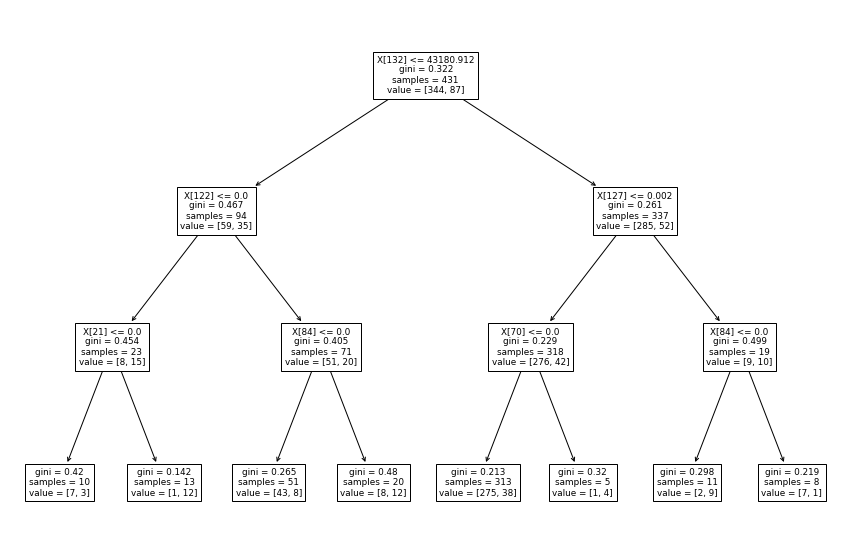

In [23]:
# We plot the decision tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, Y)
plt.figure(figsize=(15,10))
tree.plot_tree(clf)

The criteria used by the tree

In [24]:
print(X.iloc[:,132].name)
print(X.iloc[:,122].name)
print(X.iloc[:,127].name)

av_onesquaremeter_re
nb_snack_dianping
nb_mobike_05_09


There is no doubt that the result of the model is bad but it is still interesting to see that the tree used to cut the points, these 3 criteria to predict the noise:
 - the average onesquaremeter price (from real_estate dataset)
 - the number of snack shop (from dianping dataset)
 - the number of mobike in the area between 5am to 9am.

## Clean

In [25]:
X = df_pred_clean.iloc[:,0:len(df_pred_clean.columns)-1].copy()
#X = df_cendus_noise[['nb_shopping_cendus']].copy()
Y = df_pred_clean['clean'].copy()

In [26]:
Y.value_counts()

3    218
2    182
4     17
1     15
Name: clean, dtype: int64

Proportion of the class 2 & 3:

In [27]:
prop = Y.value_counts()
(prop[2.0]+prop[3.0]) / (prop[1.0] + prop[2.0] + prop[3.0] + prop[4.0]) * 100

92.5925925925926

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33, shuffle=False)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, Y, cv=5)
np.mean(scores)

0.45354183373429563

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,3,4,6,8,10,20]}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
search.fit(X,Y)
search.best_params_

{'max_depth': 20}

In [31]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
np.mean(Y_pred == Y_val)

0.5244755244755245

In [32]:
from sklearn.metrics import f1_score
f1_score(Y_val, Y_pred, average='micro')

0.5244755244755245

In [33]:
from sklearn.metrics import f1_score
f1_score(Y_val, Y_pred, average='weighted')

0.41072034761355153

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_val, Y_pred)

array([[ 0,  0,  2,  0],
       [ 0,  6, 57,  0],
       [ 0,  3, 69,  0],
       [ 0,  0,  6,  0]], dtype=int64)

In [35]:
Y_val.value_counts()

3    72
2    63
4     6
1     2
Name: clean, dtype: int64

In [36]:
pd.Series(Y_pred).value_counts()

3    134
2      9
dtype: int64

The model has predicted almost always the class 3, it has been right for 69 times on 72 but 57 times it was supposed to be the class 2

## Smell

In [37]:
X = df_pred_smell.iloc[:,0:len(df_pred_smell.columns)-1].copy()
#X = df_cendus_noise[['nb_shopping_cendus']].copy()
Y = df_pred_smell['smell'].copy()

In [38]:
Y.value_counts()

0.0    367
1.0     16
Name: smell, dtype: int64

Proportion of the class 0:

In [39]:
prop = Y.value_counts()
prop[0.0] / (prop[0.0] + prop[1.0]) * 100

95.822454308094

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33, shuffle=False)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, Y, cv=5)
np.mean(scores)

0.9477443609022558

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,3,4,6,8,10,20]}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
search.fit(X,Y)
search.best_params_

{'max_depth': 2}

In [43]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
np.mean(Y_pred == Y_val)

0.9291338582677166

In [44]:
from sklearn.metrics import f1_score
f1_score(Y_val, Y_pred, average='binary')

0.0

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_val, Y_pred)

array([[118,   3],
       [  6,   0]], dtype=int64)

The model never succeed to predict at least one correct in the class 1

In [46]:
Y_val.value_counts()

0.0    121
1.0      6
Name: smell, dtype: int64

In [47]:
pd.Series(Y_pred).value_counts()

0.0    124
1.0      3
dtype: int64